<a href="https://colab.research.google.com/github/rostronix/melanoma-case-study/blob/main/melanoma_upgrad_assignmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
print(tf.version.VERSION)

2.15.0


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num=len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
##Test Data set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  validation_split = None,
  subset = None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

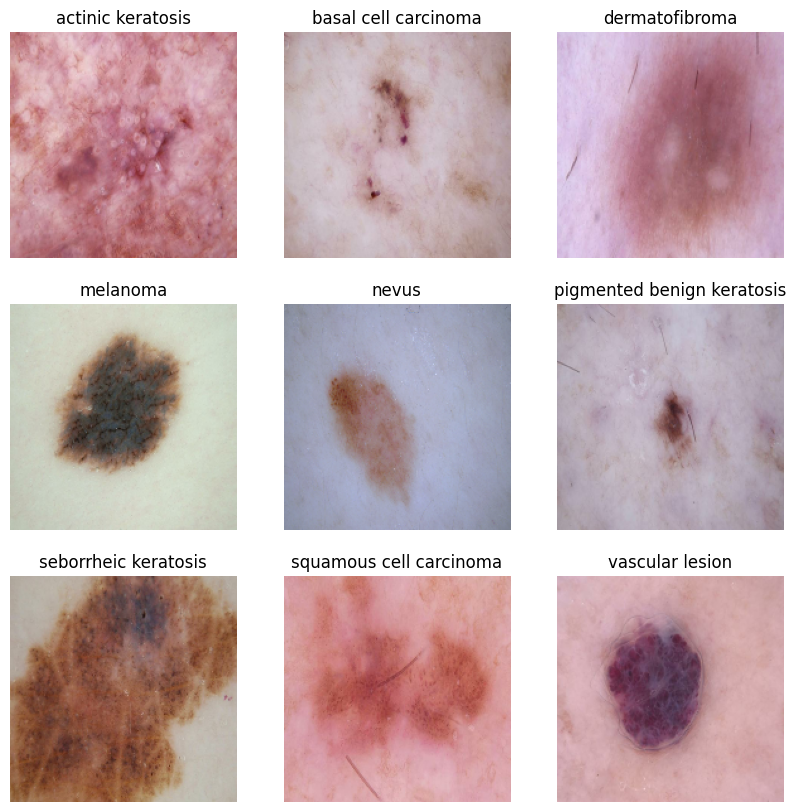

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(len(class_names)):
    ax = plt.subplot(3, 3, i + 1)
    idx = np.where(labels[:]==i)[0]
    if(len(idx) > 0):
        n = idx[0]
        img = images[n].numpy().astype("uint8")
        plt.imshow(img)
    plt.title(class_names[i])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [ ]:
# CHecking the shape of tensors : image_batch & label_batch
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

# Standardize the data
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num, activation='softmax')
])


In [ ]:
# Print Summary of the model:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 [==============================] - 61s 65ms/step - loss: 2.1540 - accuracy: 0.1486 - val_loss: 1.8559 - val_accuracy: 0.2862
Epoch 2/20
281/281 [==============================] - 7s 26ms/step - loss: 1.6362 - accuracy: 0.3532 - val_loss: 1.4323 - val_accuracy: 0.4192
Epoch 3/20
281/281 [==============================] - 8s 27ms/step - loss: 1.4243 - accuracy: 0.4433 - val_loss: 1.4016 - val_accuracy: 0.4869
Epoch 4/20
281/281 [==============================] - 8s 27ms/step - loss: 1.2603 - accuracy: 0.5153 - val_loss: 1.3333 - val_accuracy: 0.5105
Epoch 5/20
281/281 [==============================] - 8s 29ms/step - loss: 1.0643 - accuracy: 0.6020 - val_loss: 0.9642 - val_accuracy: 0.6333
Epoch 6/20
281/281 [==============================] - 7s 26ms/step - loss: 0.8583 - accuracy: 0.6795 - val_loss: 1.0223 - val_accuracy: 0.6217
Epoch 7/20
281/281 [==============================] - 8s 27ms/step - loss: 0.7071 - accuracy: 0.7420 - val_loss: 0.7065 - val_accuracy: 0.734

In [ ]:
result = model.evaluate(val_ds)
dict(zip(model.metrics_names, result))

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Findings:

## Using 3 (16,32,64) layers of CNN - Getting Train_accuracy = 81.7% and Validation_accuracy = 53.4%;
### Using 4 layers (16,32,64,64) of CNN - Getting Train_accuracy = 94% and Validation_accuracy = 83%;
### Using 5 layers (16,32,64, 64, 128) of CNN - Getting Train_accuracy = 92% and Validation_accuracy = 88%;

In first case, there is hugh difference in Training accuracy vs validation accuracy, the training accuracy is increasing whereas Validation accuracy has stabilised around 53-54 in first case. It is a sign of Overfitting;
when created the layers to 5; the accuracy (both train & validation) has increase. Which is a good sign.

Now we can try with increasing Neurons per layer and check-out;

### Using 5 layers (16,32,64, 64, 128) of CNN - Getting Train_accuracy = 92% and Validation_accuracy = 88%;

### Write your findings here

In [ ]:
#Data Augumentation
data_augmentation = keras.Sequential(
  [
   layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

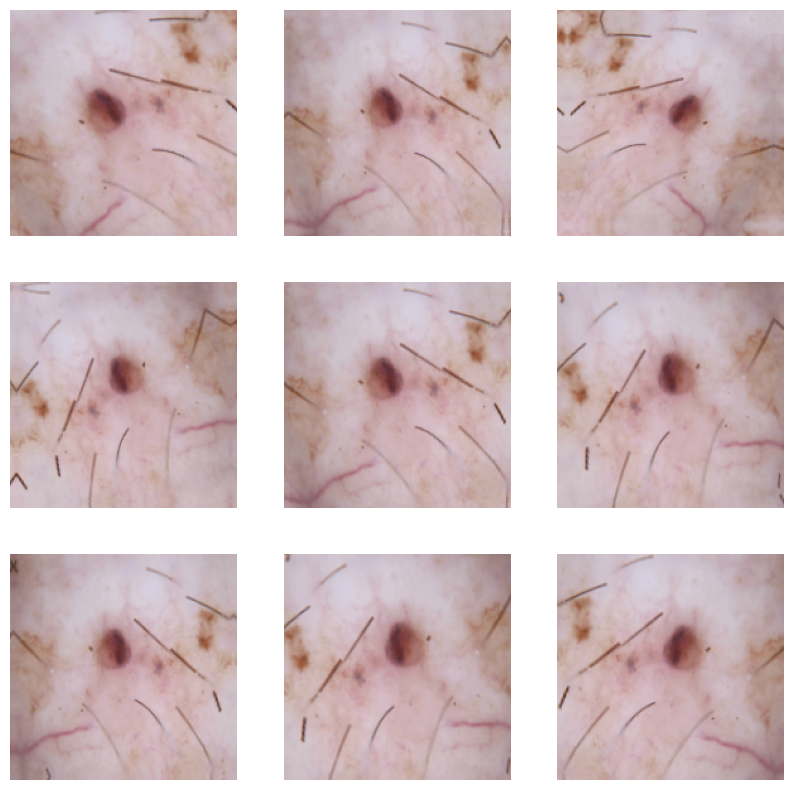

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.


plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num)]
)




### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 50ms/step - loss: 2.0257 - accuracy: 0.2416 - val_loss: 1.8109 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 1.7875 - accuracy: 0.3532 - val_loss: 1.6856 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 3s 47ms/step - loss: 1.5731 - accuracy: 0.4308 - val_loss: 1.4648 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4412 - accuracy: 0.4961 - val_loss: 1.5620 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 3s 46ms/step - loss: 1.4066 - accuracy: 0.5017 - val_loss: 1.5664 - val_accuracy: 0.4653
Epoch 6/20
56/56 [==============================] - 3s 46ms/step - loss: 1.3669 - accuracy: 0.5089 - val_loss: 1.4190 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 3s 47ms/step - loss: 1.3088 - accuracy: 0.5363 - val_loss: 1.3449 - val_accuracy: 0.5280
Epoch 8/20
56

### Visualizing the results

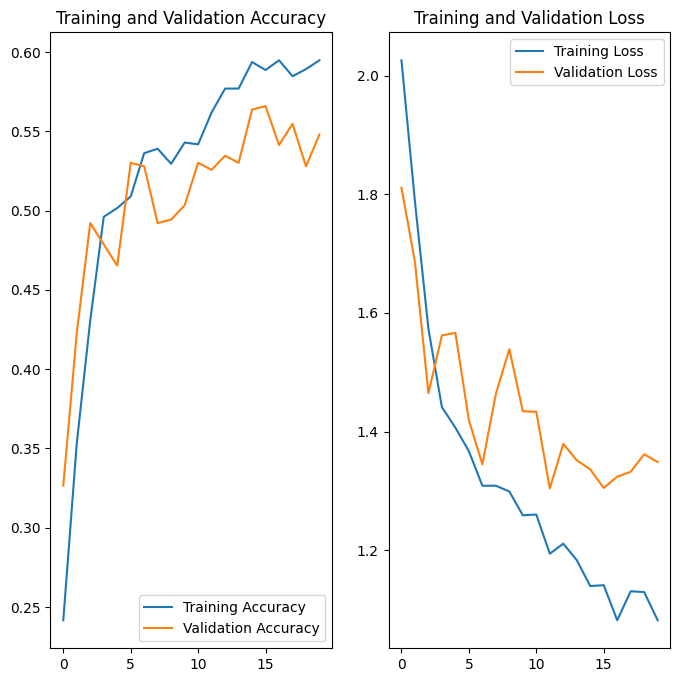

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## FIndings
This time there is a little improvement in terms of difference between the training accuracy vs validation accuracy. Although the training accuracy has fallen.

With Data Augmentation, 3 layered CNN and 1 dropout(0.2) Accuracy: 59.4%; Val_accuracy:54.8%;

With Data Augmentation, 5 Layers and 2 dropout(0.2) - Accuracy: 56.1%; Val_accuracy:51.2%

With Data Augmentation, 3 Layers(16,32,64) and 1 dropout(0.25) - Accuracy: 60.5%; Val_accuracy:57.3%

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.

skin_images_dict = {
    'actinic keratosis': list(data_dir_train.glob('actinic keratosis/*')),
    'basal cell carcinoma': list(data_dir_train.glob('basal cell carcinoma/*')),
    'dermatofibroma': list(data_dir_train.glob('dermatofibroma/*')),
    'melanoma': list(data_dir_train.glob('melanoma/*')),
    'nevus': list(data_dir_train.glob('nevus/*')),
    'pigmented benign keratosis': list(data_dir_train.glob('pigmented benign keratosis/*')),
    'seborrheic keratosis': list(data_dir_train.glob('seborrheic keratosis/*')),
    'squamous cell carcinoma': list(data_dir_train.glob('squamous cell carcinoma/*')),
    'vascular lesion': list(data_dir_train.glob('vascular lesion/*')),
}

In [ ]:
skin_labels_dict = {
    'actinic keratosis': 0,
    'basal cell carcinoma': 1,
    'dermatofibroma': 2,
    'melanoma': 3,
    'nevus': 4,
    'pigmented benign keratosis': 5,
    'seborrheic keratosis': 6,
    'squamous cell carcinoma': 7,
    'vascular lesion': 8,
}

In [ ]:
image_array=[[],[]]
i=0
for skin_image_name, images in skin_images_dict.items():
    image_array[0].append(skin_image_name)
    image_array[1].append(len(images))

print(image_array)

[['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'], [114, 376, 95, 438, 357, 462, 77, 181, 139]]


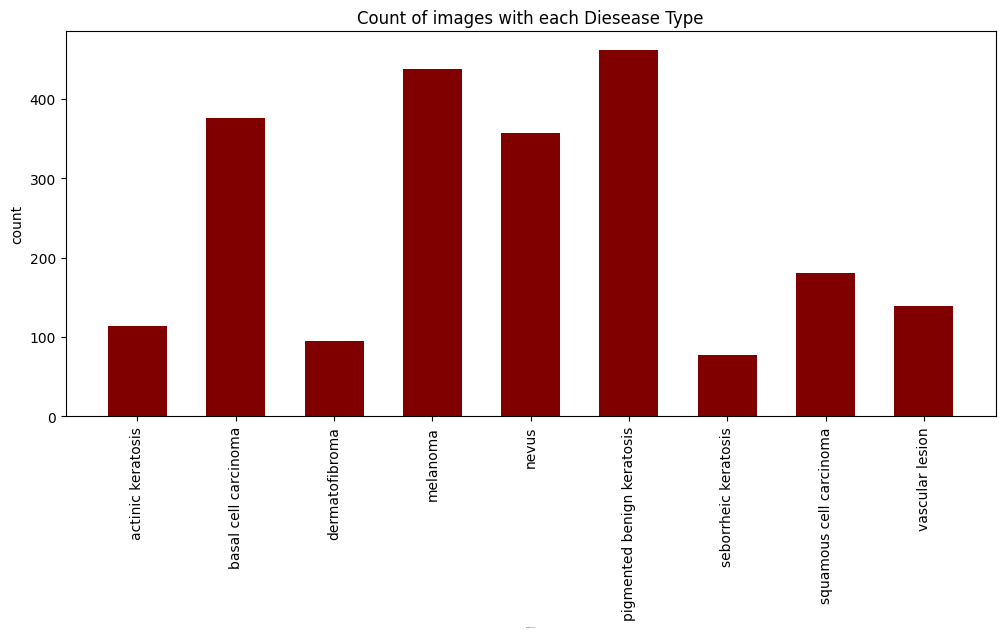

In [ ]:
plt.figure(figsize =(12, 5))
plt.bar(image_array[0], image_array[1], color ='maroon',
        width = 0.6)
plt.xticks(rotation=90)
plt.xlabel("Disease Type", fontsize=1)
#plt.xticks(rotation=45)

plt.ylabel("count")
plt.title("Count of images with each Diesease Type")
plt.show()

In [ ]:
path_to_training_dataset="/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [ ]:
from glob import glob
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_original

['/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000139.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000143.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000144.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000142.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000141.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000303.jpg',
 '/content

In [ ]:
#print(type(path_list_original))
for y in path_list_original:
    ll = os.path.basename(os.path.dirname(y))
    print(ll)

melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
melanoma
m

In [ ]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list_original

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.shape

(2239, 2)

In [ ]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
#pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
path_to_training_dataset="/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E00446D9BD0>: 100%|██████████| 500/500 [00:17<00:00, 27.84 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E004460EE60>: 100%|██████████| 500/500 [00:18<00:00, 27.14 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E004478FFA0>: 100%|██████████| 500/500 [00:18<00:00, 26.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E00B05F1A20>: 100%|██████████| 500/500 [01:34<00:00,  5.30 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7E004467A110>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E0048869630>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E00C83F1C30>: 100%|██████████| 500/500 [00:42<00:00, 11.81 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E01580D2980>: 100%|██████████| 500/500 [00:17<00:00, 27.82 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E00B0419A80>: 100%|██████████| 500/500 [00:18<00:00, 27.76 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000171.jpg_72add036-cffb-4164-9e21-fd5c1e3d1747.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010942.jpg_ecce8e1c-ef9d-47b9-9730-625b019952de.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010550.jpg_15faf51b-137f-4f36-8f63-186394e2ed30.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010797.jpg_281a6fec-1275-4fe0-8d93-8b0904d95965.jpg',
 '/content/gdrive/My Drive/Colab Notebooks/UpgradAssignment-Melanoma/Skin ca

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-58-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)       

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## use 30 epochs, as per the assignment
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 59s 191ms/step - loss: 1.5790 - accuracy: 0.4358 - val_loss: 3.4397 - val_accuracy: 0.1722
Epoch 2/30
281/281 [==============================] - 51s 180ms/step - loss: 1.2051 - accuracy: 0.5460 - val_loss: 1.3613 - val_accuracy: 0.5171
Epoch 3/30
281/281 [==============================] - 55s 194ms/step - loss: 1.0368 - accuracy: 0.6130 - val_loss: 2.1390 - val_accuracy: 0.3996
Epoch 4/30
281/281 [==============================] - 52s 181ms/step - loss: 0.9394 - accuracy: 0.6451 - val_loss: 0.9468 - val_accuracy: 0.6355
Epoch 5/30
281/281 [==============================] - 51s 179ms/step - loss: 0.8503 - accuracy: 0.6759 - val_loss: 2.1142 - val_accuracy: 0.4762
Epoch 6/30
281/281 [==============================] - 54s 188ms/step - loss: 0.7574 - accuracy: 0.7130 - val_loss: 2.6657 - val_accuracy: 0.3961
Epoch 7/30
281/281 [==============================] - 51s 179ms/step - loss: 0.6960 - accuracy: 0.7395 - val_loss: 0.6761 - val_ac

#### **Todo:**  Visualize the model results

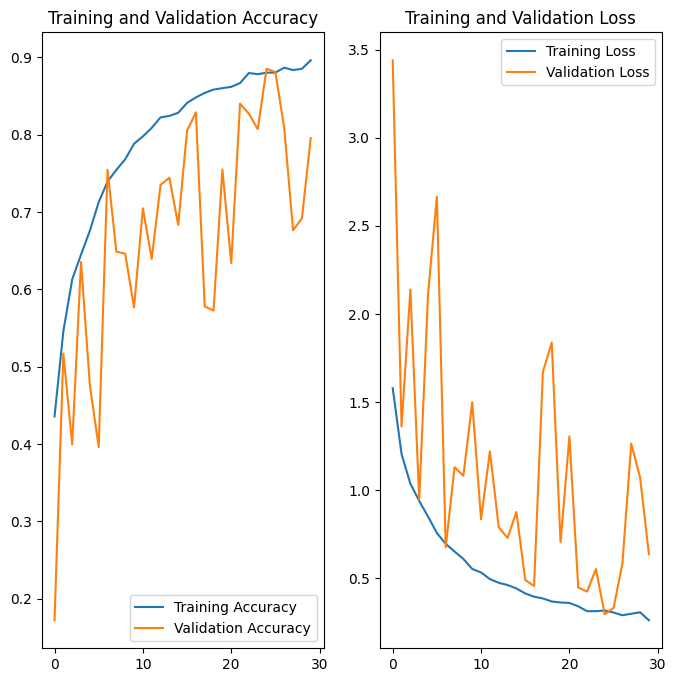

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



###### Findings:

#### 3 layers16,32,64),, Augmented dataset, 1 dropouts(0.2), BatchNormalization - Accuracy=72.9%; Val-Accuracy=61.0%;
#### 3 layers(16,32,64), Augmented dataset, 2 dropouts(0.2), BatchNormalization - Accuracy=73%; Val-Accuracy=59.6%;
#### 5 layers (16,32,64,64,128), Augmented dataset, 3 dropouts(0.2), BatchNormalization - Accuracy=80.8%; Val-Accuracy=48.1%;
#### 5 layers (16,32,64,64,128), Augmented dataset, 3 dropouts(0.2), BatchNormalization - Accuracy=81.8%; Val-Accuracy=51.7%;
#### 5 layers (32,32,64,64,128), Augmented dataset, 3 dropouts(0.2), BatchNormalization - Accuracy=83.8%; Val-Accuracy=53.7%;
### Best one: 5 layers (16,32,64,64,128), Augmented dataset, 1 dropouts(0.2), BatchNormalization - Accuracy=88%; Val-Accuracy=69.6%;

In [ ]:
print("Evaluate Model#3")
result = model.evaluate(val_ds)
dict(zip(model.metrics_names, result))

Evaluate Model#3
71/71 [==============================] - 9s 114ms/step - loss: 0.6374 - accuracy: 0.7957


{'loss': 0.6374054551124573, 'accuracy': 0.7957276105880737}